In [1]:
!pip install torchvision torch matplotlib

from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

In [3]:
#display data points
print(train_data)

#display test points
print(test_data)

train_data.data.size()


Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


torch.Size([60000, 28, 28])

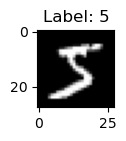

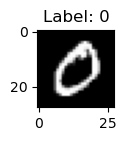

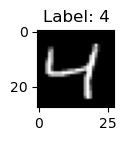

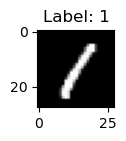

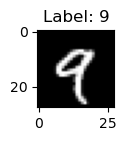

In [4]:
import matplotlib.pyplot as plt

 # Print the first 5 images
for i in range(5): 
    image, label = train_data[i]
    plt.figure(figsize=(1, 1))
    plt.imshow(image.squeeze(), cmap='gray') 
    plt.title('Label: {}'.format(label))
    plt.show()

In [5]:
from torch.utils.data import DataLoader

#Setting up data learner
loaders = {
    
    'train': DataLoader(train_data,
                       batch_size=100,
                       shuffle=True,
                       num_workers=1),
    
    'test': DataLoader(train_data,
                       batch_size=100,
                       shuffle=True,
                       num_workers=1),
    
}

In [6]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        
        return F.softmax(x)


In [7]:
import torch

#Choose GPU if avilable else cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            #print(f'Train epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} 
             #     ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')
            print(f'Train epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} '
              f'({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
    model.eval()
                  
    test_loss = 0
    correct = 0
                  
    with torch.no_grad():
            for data, target in loaders['test']:
                  data, target = data.to(device), target.to(device)
                  output = model(data)
                  test_loss += loss_fn(output, target).item()
                  pred = output.argmax(dim=1, keepdim=True)
                  correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} '
      f'({100. * correct/len(loaders["test"].dataset):.0f})%\n')

In [8]:
for epoch in range(1, 11):
    train(epoch)
    test()

C:\Users\charl\AppData\Local\Temp\ipykernel_1472\242313134.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train epoch: 1 [0/60000 (0%)]	2.302435
Train epoch: 1 [2000/60000 (3%)]	2.285414
Train epoch: 1 [4000/60000 (7%)]	2.149841
Train epoch: 1 [6000/60000 (10%)]	2.054066
Train epoch: 1 [8000/60000 (13%)]	1.908436
Train epoch: 1 [10000/60000 (17%)]	1.896045
Train epoch: 1 [12000/60000 (20%)]	1.782963
Train epoch: 1 [14000/60000 (23%)]	1.829739
Train epoch: 1 [16000/60000 (27%)]	1.801088
Train epoch: 1 [18000/60000 (30%)]	1.774784
Train epoch: 1 [20000/60000 (33%)]	1.743579
Train epoch: 1 [22000/60000 (37%)]	1.796383
Train epoch: 1 [24000/60000 (40%)]	1.699163
Train epoch: 1 [26000/60000 (43%)]	1.689237
Train epoch: 1 [28000/60000 (47%)]	1.673699
Train epoch: 1 [30000/60000 (50%)]	1.683554
Train epoch: 1 [32000/60000 (53%)]	1.651582
Train epoch: 1 [34000/60000 (57%)]	1.638567
Train epoch: 1 [36000/60000 (60%)]	1.664890
Train epoch: 1 [38000/60000 (63%)]	1.657210
Train epoch: 1 [40000/60000 (67%)]	1.647633
Train epoch: 1 [42000/60000 (70%)]	1.688745
Train epoch: 1 [44000/60000 (73%)]	1.589782

Train epoch: 7 [0/60000 (0%)]	1.577293
Train epoch: 7 [2000/60000 (3%)]	1.547427
Train epoch: 7 [4000/60000 (7%)]	1.582168
Train epoch: 7 [6000/60000 (10%)]	1.586448
Train epoch: 7 [8000/60000 (13%)]	1.508092
Train epoch: 7 [10000/60000 (17%)]	1.572235
Train epoch: 7 [12000/60000 (20%)]	1.558136
Train epoch: 7 [14000/60000 (23%)]	1.539360
Train epoch: 7 [16000/60000 (27%)]	1.559285
Train epoch: 7 [18000/60000 (30%)]	1.555264
Train epoch: 7 [20000/60000 (33%)]	1.543237
Train epoch: 7 [22000/60000 (37%)]	1.527124
Train epoch: 7 [24000/60000 (40%)]	1.575636
Train epoch: 7 [26000/60000 (43%)]	1.557117
Train epoch: 7 [28000/60000 (47%)]	1.631023
Train epoch: 7 [30000/60000 (50%)]	1.529235
Train epoch: 7 [32000/60000 (53%)]	1.520293
Train epoch: 7 [34000/60000 (57%)]	1.556605
Train epoch: 7 [36000/60000 (60%)]	1.565153
Train epoch: 7 [38000/60000 (63%)]	1.545124
Train epoch: 7 [40000/60000 (67%)]	1.536780
Train epoch: 7 [42000/60000 (70%)]	1.519450
Train epoch: 7 [44000/60000 (73%)]	1.502917

C:\Users\charl\AppData\Local\Temp\ipykernel_1472\242313134.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Prediction: 7


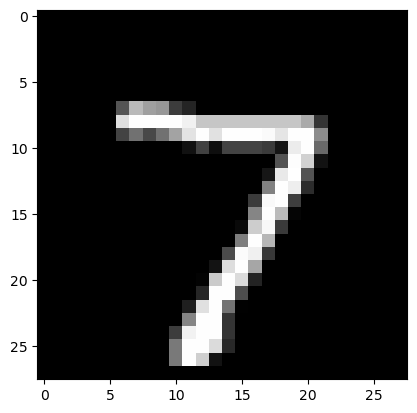

In [12]:
#SAMPLE TEST RESULT

import matplotlib.pyplot as plt

model.eval()

data, target = test_data[0]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')

plt.show()

In [13]:
import random

Prediction: 5


C:\Users\charl\AppData\Local\Temp\ipykernel_1472\242313134.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


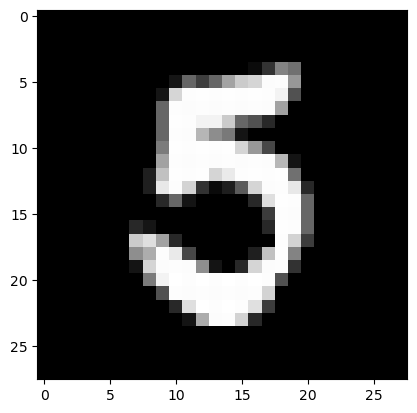

In [16]:
#Display Random test case

model.eval()

size = len(test_data)
data, target = test_data[random.randint(0, size-1)]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')

plt.show()